<a href="https://colab.research.google.com/github/yashb98/90Days_Machine_learinng/blob/main/Telco_Customer_Churn(ML_project_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 1: Data Preperation and Exploration

Here are the key Python libraries we will need.





In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


In [50]:
df = pd.read_excel('/content/Telco_customer_churn.xlsx')
print("First 5 rows of the dataset: ")
print(df.head())

print("\nDataframe Info: ")
print(df.info())



First 5 rows of the dataset: 
   CustomerID  Count        Country       State         City  Zip Code  \
0  3668-QPYBK      1  United States  California  Los Angeles     90003   
1  9237-HQITU      1  United States  California  Los Angeles     90005   
2  9305-CDSKC      1  United States  California  Los Angeles     90006   
3  7892-POOKP      1  United States  California  Los Angeles     90010   
4  0280-XJGEX      1  United States  California  Los Angeles     90015   

                 Lat Long   Latitude   Longitude  Gender  ...        Contract  \
0  33.964131, -118.272783  33.964131 -118.272783    Male  ...  Month-to-month   
1   34.059281, -118.30742  34.059281 -118.307420  Female  ...  Month-to-month   
2  34.048013, -118.293953  34.048013 -118.293953  Female  ...  Month-to-month   
3  34.062125, -118.315709  34.062125 -118.315709  Female  ...  Month-to-month   
4  34.039224, -118.266293  34.039224 -118.266293    Male  ...  Month-to-month   

  Paperless Billing             Paymen

### 1. Data Cleaning:




In [51]:


# Find rows where 'Total Charges' is just a space
# and replace the space with a NaN value
df['Total Charges'] = df['Total Charges'].replace(' ', np.nan)

# Now, fill those NaN values with 0. This is our imputation step.
df['Total Charges'] = df['Total Charges'].fillna(0)

# Finally, convert the entire column to a numeric (float) type
df['Total Charges'] = pd.to_numeric(df['Total Charges'])


# --- VERIFICATION ---
# Let's check if the cleaning worked.
print(f"Data type of 'Total Charges' is now: {df['Total Charges'].dtype}")
print(f"Number of missing values in 'Total Charges': {df['Total Charges'].isnull().sum()}")

# Check the churn distribution again to see that we still have both "Yes" and "No"
print("\nChurn Label counts after cleaning:")
print(df['Churn Label'].value_counts())

Data type of 'Total Charges' is now: float64
Number of missing values in 'Total Charges': 0

Churn Label counts after cleaning:
Churn Label
No     5174
Yes    1869
Name: count, dtype: int64


/tmp/ipython-input-1908028362.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Total Charges'] = df['Total Charges'].replace(' ', np.nan)


/tmp/ipython-input-2732247582.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=internet_churn_rates.index, y=internet_churn_rates.values, palette='coolwarm')


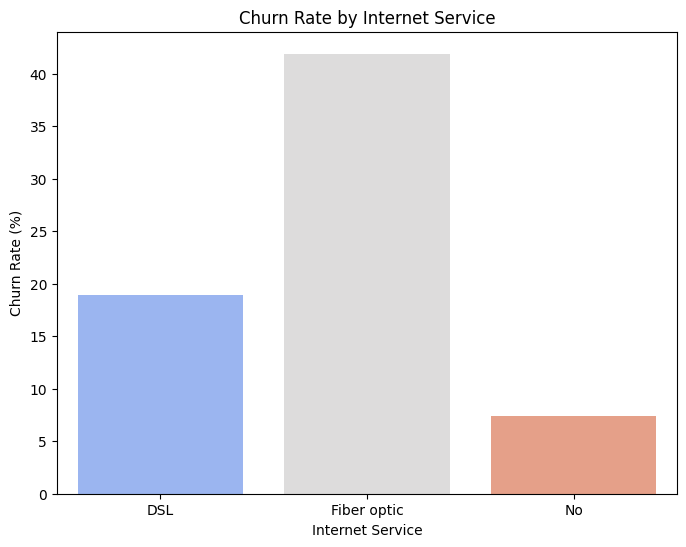

In [53]:


# Convert churn column to numeric if needed
if df['Churn Label'].dtype == 'object':
    df['Churn Label'] = df['Churn Label'].map({'Yes': 1, 'No': 0})

# Calculate churn rate by Internet Service type
internet_churn_rates = df.groupby('Internet Service')['Churn Label'].mean() * 100

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=internet_churn_rates.index, y=internet_churn_rates.values, palette='coolwarm')
plt.title('Churn Rate by Internet Service')
plt.xlabel('Internet Service')
plt.ylabel('Churn Rate (%)')
plt.show()

*This* cell calculates and visualise the churn rate for each type of internet service. It first identifies the columns related to internet service after one-hot encoding, then calculates the mean churn rate for customers with each service type, and finally displays a bar plot showing the churn rate by internet service.

#### 2. Feature Engineering and Encoding
In this step, we:
- Create a new categorical feature 'Tenure Group' from 'Tenure Months' to analyze churn trends by tenure.
- Identify remaining categorical features and apply one-hot encoding to convert them into numerical format for modeling.

### 2. Exploratory Data Analysis (EDA)

Once the data is clean, we will perform some basic EDA to understand the key trends in our data:

1. **Overall Churn Rate:** We will calculate the percentage of customers who have churned.

2. **Visualise Key Features:** We'll use plots to see the relationship between churn and important features like **Tenure Months**, **Monthly Charges**, and **Contract type**. This will give us valuable insights into what drives customer churn. For example, we can observe if customers with shorter tenures or month-to-month contracts are more likely to churn.

This comprehensive approach ensures our data is well-prepared and that we have a solid understanding of the patterns before we begin building the models.

#### 1. Basic Data Inspection

Get a high level overview of the data types, non-missing values, and statistical summaries


In [33]:
## Print a concise summary of the DataFrame (data types, non-null counts)
print("--- Dataset Info ---")
df.info()

# Print a statistical summary for all numerical columns
print("\n\n--- Statistical Summary ---")
print(df.describe())

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Int

In [34]:
df['Churn Label'].value_counts()

,count
Churn Label,
No,5174
Yes,1869


#### 2. Analyse the Churn Distribution

Visualise the balance between customers who churned and those who did not

/tmp/ipython-input-965726979.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn Label', data=df, palette='viridis')


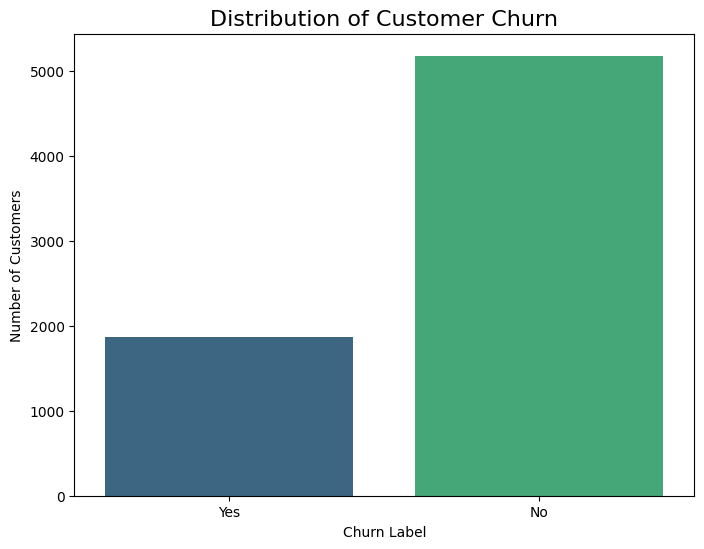

In [35]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn Label', data=df, palette='viridis')
plt.title('Distribution of Customer Churn', fontsize=16)
plt.xlabel('Churn Label')
plt.ylabel('Number of Customers')
plt.savefig('churn_distribution.png', dpi=300)
plt.show()

#### 3. Analyse Numerical and Categorical Features  vs Churn

Let's explore the distribution of key numerical features like tenure, monthly charges, and total charges, and see how they relate to churn

---



---



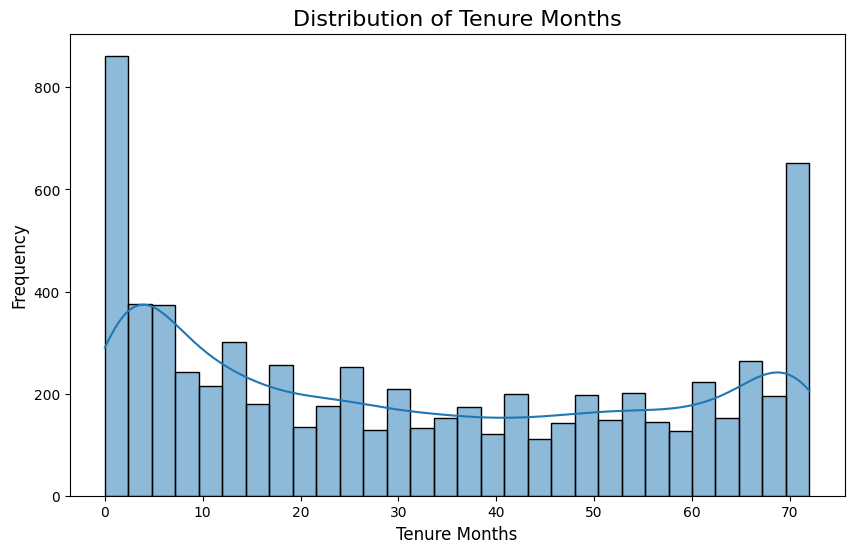

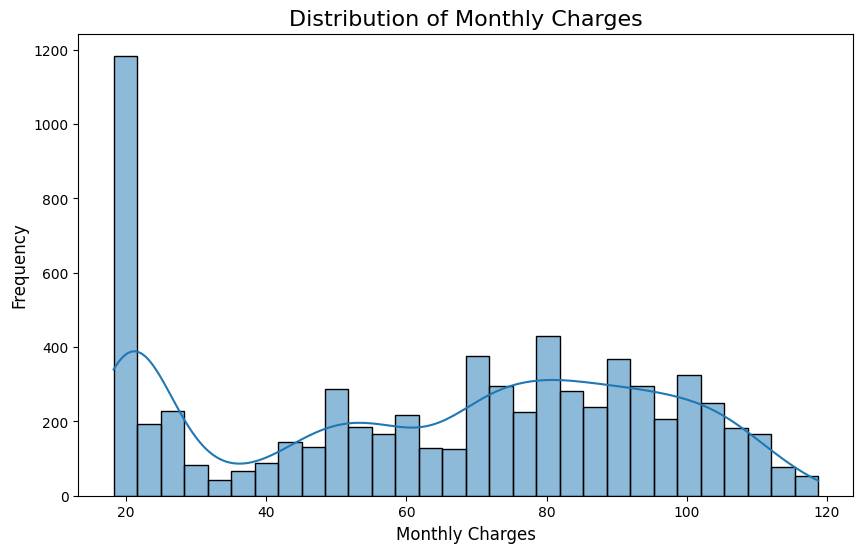

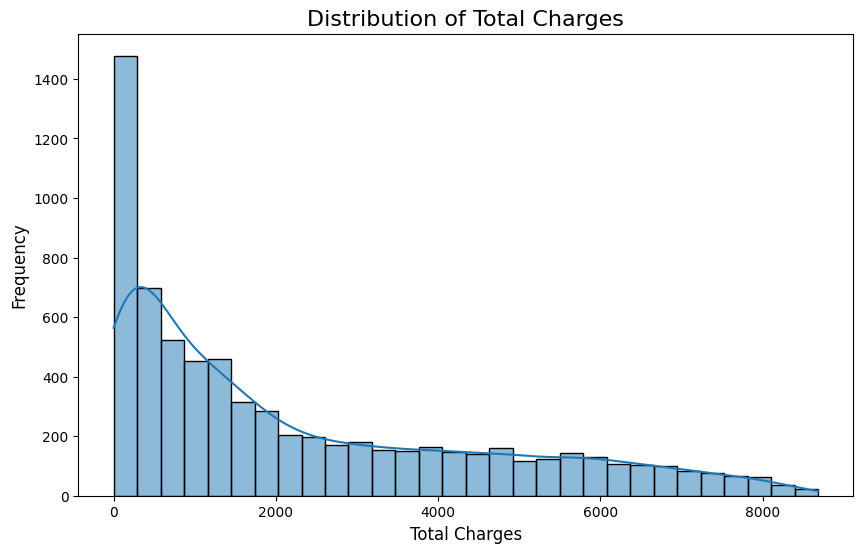

/tmp/ipython-input-1647029671.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn Label', y=col, data=df, palette='pastel')


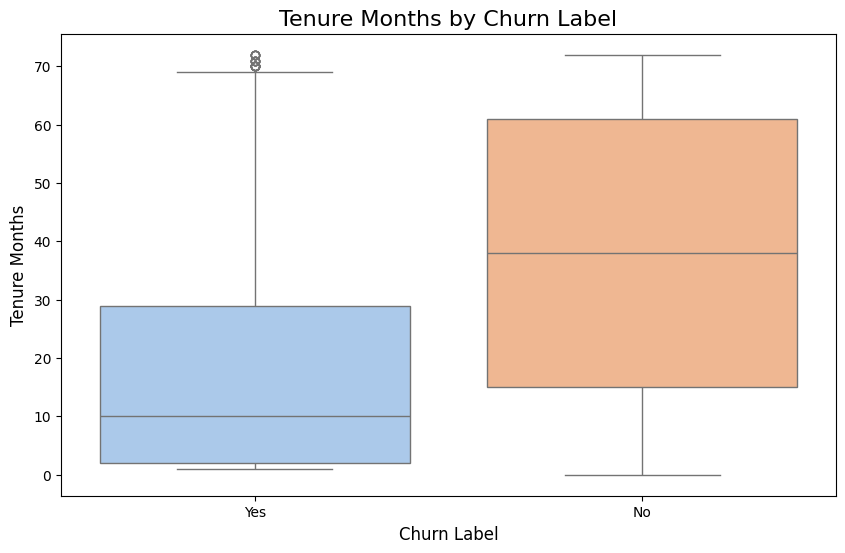

/tmp/ipython-input-1647029671.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn Label', y=col, data=df, palette='pastel')


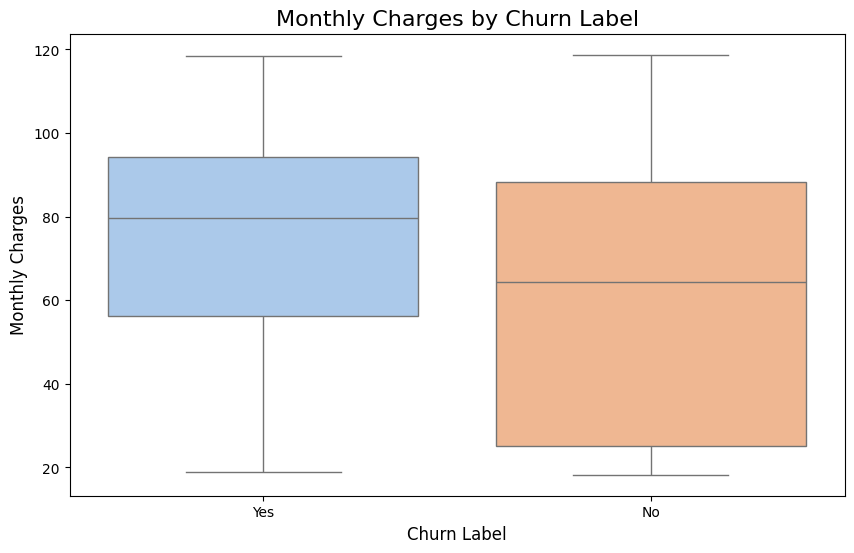

/tmp/ipython-input-1647029671.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn Label', y=col, data=df, palette='pastel')


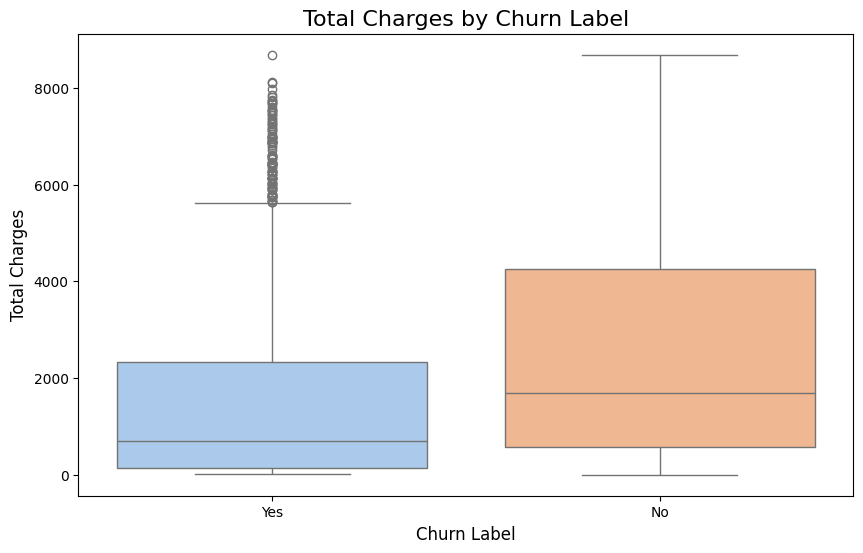

In [37]:
# List of numerical features to analyze
numerical_features = ['Tenure Months', 'Monthly Charges', 'Total Charges']

# Create histograms for each numerical feature
for col in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}', fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.savefig(f'{col}_distribution.png', dpi=300)
    plt.show()

# Create box plots to see the relationship between numerical features and churn
for col in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Churn Label', y=col, data=df, palette='pastel')
    plt.title(f'{col} by Churn Label', fontsize=16)
    plt.xlabel('Churn Label', fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.savefig(f'{col}_by_churn.png', dpi=300)
    plt.show()

1. **Distribution of Tenure Months:** The "U-shape" shows that the customer base is made up of two main groups: a large number of brand new customers and a large number of very loyal, long-term customers.

2. **Distribution of Monthly Charges:** This plot shows that most customers are on lower-cost, basic plans. Fewer customers subscribe to more expensive, premium services.

3. **Distribution of Total Charges:** The chart is heavily skewed by new customers who haven't had time to pay very much. The long tail represents the loyal customers who have paid a significant amount to the company over their lifetime.

4. **Tenure by Churn Label:** This shows that new customers are far more likely to leave. Customers who churn have a much lower average tenure than those who stay.

5. **Monthly Charges by Churn Label:** This shows that customers with higher monthly bills are more likely to churn.

6. **Total Charges by Churn Label:** This shows that churners have lower total charges only because they are new customers and haven't had time to accumulate a large total bill.



#### 4. Correlation Analysis

Check for relationships between numerical features using a heatmap

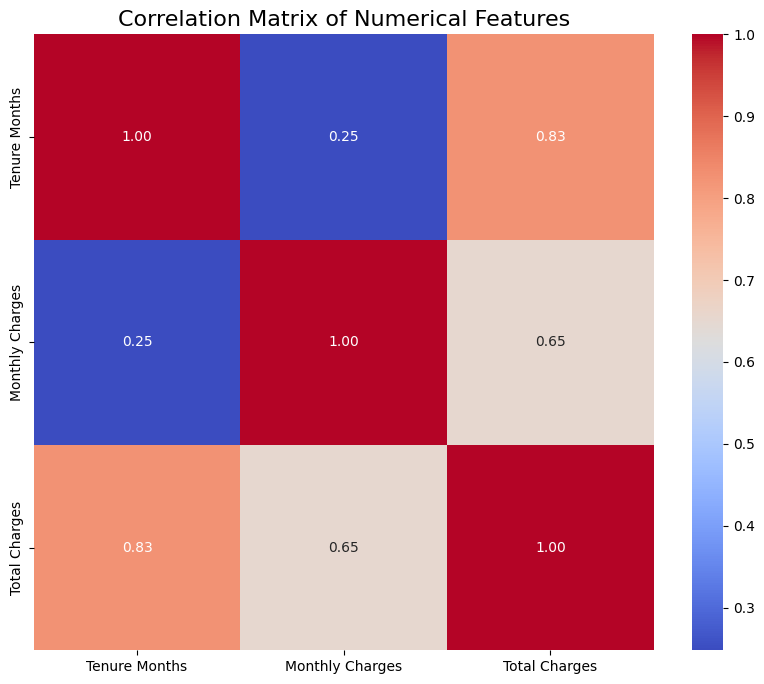

In [38]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_features].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.savefig('correlation_heatmap.png', dpi=300)
plt.show()

**Analysis of Key Correlations**
The heatmap reveals the following key relationships, quantified by Pearson's correlation coefficient (r):

1. **Tenure Months and Total Charges (r = 0.83):** A strong positive correlation is observed between these two variables. This indicates a direct and robust relationship where an increase in a customer's tenure is strongly associated with a proportional increase in their cumulative total charges. This is an expected outcome, as total charges are a function of recurring monthly payments over time.

2. **Monthly Charges and Total Charges (r = 0.65):** There is a moderate positive correlation between monthly and total charges. This signifies that customers with higher monthly bills tend to have higher total charges. The relationship is not as strong as the one with tenure because tenure acts as a confounding variable; a new customer may have a high monthly charge but will still have a low total charge, thus weakening the linear association.

3. **Tenure Months and Monthly Charges (r = 0.25):** A weak positive correlation exists between tenure and monthly charges. This implies that there is no significant linear relationship between the duration of a customer's contract and the amount they are charged each month. This suggests that the customer base is diverse, with both new and tenured customers distributed across various pricing plans.

## Step 2: Feature Engineering and Preprocessing

This is where we correctly prepare the data for our machine learning models, ensuring there is no data leakage.

In [39]:
# --- Define Target (y) and Features (X) ---
# 'Churn Value' is the target we want to predict.
y = df['Churn Value']

# These are the columns to drop: leaky ones that give away the answer and
# irrelevant ones that don't help with prediction.
columns_to_drop = [
    'CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
    'Lat Long', 'Latitude', 'Longitude', 'Churn Label', 'Churn Value',
    'Churn Score', 'CLTV', 'Churn Reason'
]

# 'X' contains our features for the model.
X = df.drop(columns=columns_to_drop)


# --- Set Up Preprocessing Pipelines ---
# Identify which columns are numerical and which are categorical.
categorical_features_model = X.select_dtypes(include=['object']).columns
numerical_features_model = X.select_dtypes(include=['int64', 'float64']).columns

# Create transformers to apply scaling to numerical data and one-hot encoding to categorical data.
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Use ColumnTransformer to bundle these preprocessing steps.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features_model),
        ('cat', categorical_transformer, categorical_features_model)
    ])

print("Feature engineering and preprocessing steps are defined.")

Feature engineering and preprocessing steps are defined.


## Step 3: Model Training and Evaluation

Finally, we split the data, build the full model pipelines, and evaluate them using cross-validation to get realistic and trustworthy performance scores.



In [40]:
from sklearn.model_selection import train_test_split

### 1. Split the Data into Training and Testing

In [43]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



### 2. Define Model Pipeline

Each pipeline bundles the preprocessing and the classifier into a single object

In [44]:

lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', LogisticRegression(random_state=42, max_iter=1000))])

rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(random_state=42))])

gb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', GradientBoostingClassifier(random_state=42))])




### 3. Evaluate Models with Cross-Validation

In [45]:
# --- Evaluate Models with Cross-Validation ---
print("\nTraining models and evaluating with cross-validation...")
print("\nCross-Validation Scores (Accuracy):")

# Perform 5-fold cross-validation on the training data.
lr_scores = cross_val_score(lr_pipeline, X_train, y_train, cv=5, scoring='accuracy')
rf_scores = cross_val_score(rf_pipeline, X_train, y_train, cv=5, scoring='accuracy')
gb_scores = cross_val_score(gb_pipeline, X_train, y_train, cv=5, scoring='accuracy')

# Print the final, realistic performance of each model.
print(f"Logistic Regression: {lr_scores.mean():.2f} (+/- {lr_scores.std() * 2:.2f})")
print(f"Random Forest: {rf_scores.mean():.2f} (+/- {rf_scores.std() * 2:.2f})")
print(f"Gradient Boosting: {gb_scores.mean():.2f} (+/- {gb_scores.std() * 2:.2f})")


Training models and evaluating with cross-validation...

Cross-Validation Scores (Accuracy):
Logistic Regression: 0.81 (+/- 0.02)
Random Forest: 0.79 (+/- 0.02)
Gradient Boosting: 0.81 (+/- 0.02)


#### Model Comparison
1. **Logistic Regression & Gradient Boosting (81% Accuracy):** These are your top-performing models. They correctly predicted whether a customer would churn approximately 81% of the time during testing. Their identical scores suggest that for this dataset, the simpler, more interpretable linear model (Logistic Regression) is just as effective as the more complex and powerful ensemble model (Gradient Boosting).

2. **Random Forest (79% Accuracy):** This model is also a strong performer, coming in just slightly behind the other two at 79% accuracy. While it's a small difference, it indicates that the other two models were slightly better at generalizing to new data in this specific case.

### 4. Comparison Plot

/tmp/ipython-input-2584360793.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=model_names, y=model_scores, palette='viridis')


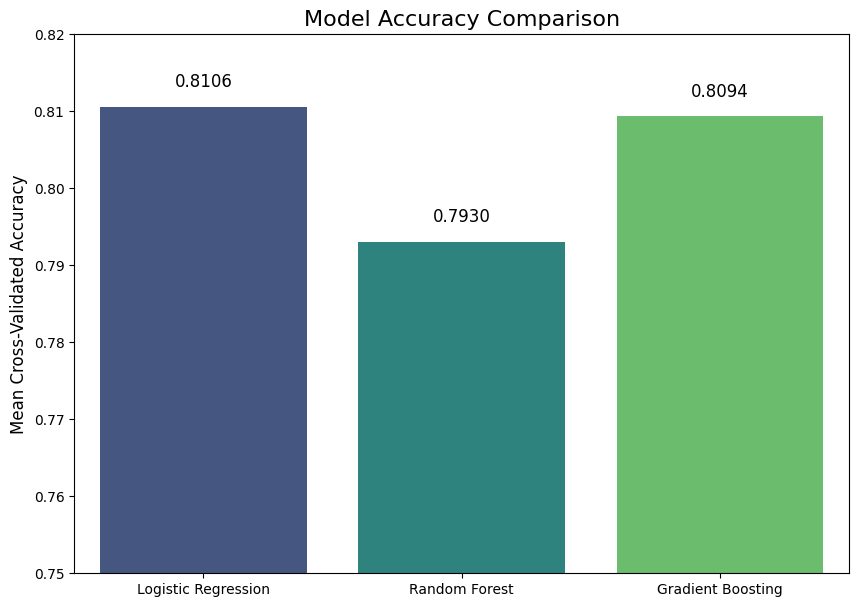

In [46]:

model_names = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']
model_scores = [lr_scores.mean(), rf_scores.mean(), gb_scores.mean()]

plt.figure(figsize=(10, 7))
ax = sns.barplot(x=model_names, y=model_scores, palette='viridis')
plt.title('Model Accuracy Comparison', fontsize=16)
plt.ylabel('Mean Cross-Validated Accuracy', fontsize=12)
plt.ylim(0.75, 0.82)  # Set y-axis limits to better highlight differences

# Add the accuracy values on top of the bars
for i, score in enumerate(model_scores):
    ax.text(i, score + 0.002, f'{score:.4f}', ha='center', va='bottom', fontsize=12)

plt.savefig('model_comparison_final.png', dpi=300)
plt.show()
